# Analisi dell'impatto ambientale della produzione di cibi e mangimi
### In base ai dati raccolti dall' Organizzazione delle Nazioni Unite capiremo quali sono gli alimenti che richiedono più risorse naturali in modo tale da poter spostare il focus produttivo su alimenti più sostenibili per l'ambiente.

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


FAO_df = pd.read_csv("data/FAO.csv", encoding='latin-1')
Food_Production_df = pd.read_csv("data/Food_Production.csv")
FAO_df["Type"] = ""

## Visualizzazione dei tipi di dato a disposizione

In [327]:
FAO_df.columns, Food_Production_df.columns

(Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
        'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
        'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
        'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
        'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
        'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
        'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
        'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
        'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Type'],
       dtype='object'),
 Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
        'Transport', 'Packging', 'Retail', 'Total_emissions',
        'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
        'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
        'Eutrophy

## Campioni di valori presenti nei datasets

In [328]:
FAO_df

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Type
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360,
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451,
21473,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15,
21474,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40,
21475,ZWE,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,


In [329]:
Food_Production_df

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.923080,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.774650,13449.891480
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.176470,3762.568306
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,...,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.820513,...,NaN,620.1,0.911681,NaN,0.581197,2.04,NaN,16438.6,NaN,4683.361823
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.541311,...,NaN,217.7,0.515670,NaN,0.521368,1.83,NaN,9493.3,NaN,2704.643875
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6,5.008798,...,203.503036,435.7,0.524927,0.836058,4.565982,15.57,7.272303,22477.4,10498.552080,NaN


# Fenomeni e colonne

### Uno dei fenomeni da tenere sicuramente in considerazione è l'eutrofizzazione (Eutrophying) che porta alla morte di flora e fauna marina. Quindi sarà un dato che prenderemo in considerazione.
### Le colonne dove non è segnata l'unità di misura a livello di consumo ci si riferisce al consumo in KG di CO2

# Colonne del primo dataset
#### Del primo dataset andremo a considerare le seguenti colonne:
- **Area Abbreviation -> Abbreviazione dell'area**
- **Area -> Area scritta per esteso**
- **Item -> Prodotto**
- **Element -> Mangime o Cibo**
- **Unit -> Unità di misura per la produzione**
- **Tutte le colonne che iniziano con Y -> Quanto è stato prodotto ogni anno**

In [330]:
# Selezione delle colonne del primo dataset
colonne_interessate = ["Area Abbreviation", "Area", "Item", "Element", "Unit", "Type"]
FAO_df_colonne_interessate = [ colonna for colonna in FAO_df.columns if colonna.startswith("Y") or (colonna in colonne_interessate)]
FAO_df[FAO_df_colonne_interessate]

,Area Abbreviation,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Type
0,AFG,Afghanistan,Wheat and products,Food,1000 tonnes,1928.0,1904.0,1666.0,1950.0,2001.0,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,183.0,183.0,182.0,220.0,220.0,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,
2,AFG,Afghanistan,Barley and products,Feed,1000 tonnes,76.0,76.0,76.0,76.0,76.0,...,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360,
3,AFG,Afghanistan,Barley and products,Food,1000 tonnes,237.0,237.0,237.0,238.0,238.0,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,
4,AFG,Afghanistan,Maize and products,Feed,1000 tonnes,210.0,210.0,214.0,216.0,216.0,...,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZWE,Zimbabwe,Milk - Excluding Butter,Food,1000 tonnes,230.0,232.0,234.0,238.0,234.0,...,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451,
21473,ZWE,Zimbabwe,"Fish, Seafood",Feed,1000 tonnes,27.0,25.0,27.0,23.0,27.0,...,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15,
21474,ZWE,Zimbabwe,"Fish, Seafood",Food,1000 tonnes,6.0,6.0,6.0,8.0,9.0,...,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40,
21475,ZWE,Zimbabwe,"Aquatic Products, Other",Food,1000 tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,


# Estrapolazione degli alimenti il cui inquinamento è tracciato


##### In queste colonne bisogna aggiustare alcune righe poichè ci sono alcuni record che hanno 2 prodotti come ad esempio Wheat & Rye che sono unificati.

In [331]:
cibi = Food_Production_df["Food product"]
# Adattamento per favorire l'incrocio dati
cibi_temp = list()
for cibo in cibi:
     if "Beef" not in cibo:
          split = cibo.split('&')
          cibi_temp.append(str.strip(split[0]))
          if len(split) > 1:
               cibi_temp.append(str.strip(split[1]))
cibi_temp.sort()
cibi = pd.Series(cibi_temp)


# Incorcio dei dati
### L'incrocio dei dati porterà ad una diminuzione del campione il che è naturale poichè non vengono tracciati tutti i cibi che ci sono nel dataset delle Nazioni Unite.

In [332]:
# Funzione per incrocio dati
def incrocio_dati(df, cibi, prodotti_tracciati, colonne) -> None:
     for index, record in FAO_df[FAO_df_colonne_interessate].iterrows():
          food_type = record["Item"].lower()
          # Caso del dizionario
          if(isinstance(cibi, dict)):
               for key in cibi.keys():
                    if food_type.startswith(cibi[key].lower()) and index not in prodotti_tracciati:
                         prodotti_tracciati.append(index)
                         FAO_df.at[index, "Type"] = key
          # Caso lista/pd.series.Series
          elif(isinstance(cibi, pd.core.series.Series) or isinstance(cibi, list)):
               for i in range(len(cibi)):
                    if food_type.startswith(cibi[i].lower()) and index not in prodotti_tracciati:
                         prodotti_tracciati.append(index)
                         FAO_df.at[index, "Type"] = cibi[i]
          # Caso di un tipo non permesso
          else:
               print("No type encoded")


In [333]:
# Inserimento nel df in base al tipo di alimento(pt.1)
prodotti_tracciati = list()
incrocio_dati(FAO_df, cibi, prodotti_tracciati, colonne_interessate)
print("Numero di prodotti tracciati: ", len(prodotti_tracciati))

Numero di prodotti tracciati:  4369


# Dati non presi
#### Alcuni dati non sono stati presi a causa della differente nomenclatura tra i datasets in particolare: 
- **Beet Sugar**
- **Cane Sugar**
- **Citrus Fruit**
- **Fish (farmed)**
- **Other Fruit**
- **Other Pulses**
- **Other Vegetable**
- **Pig Meat**
- **Sunflower Oil**

#### Effettuerò delle modifiche alle nomenclature al fine di estrapolarli.

In [334]:
colonne_dict = {
     'Beet Sugar': 'sugar beet',
     'Cane Sugar': 'sugar cane',
     'Citrus Fruit': 'citrus',
     'Fish (farmed)': 'fish',
     'Other Fruit': 'fruits, other',
     'Other Pulses': 'pulses, other and product',
     'Other Vegetables': 'vegetables, other',
     'Pig Meat': 'pigmeat',
     'Beef (beef herd)': 'bovine meat'
}

incrocio_dati(FAO_df, colonne_dict, prodotti_tracciati, colonne_interessate)
print("Numero di prodotti tracciati: ", len(prodotti_tracciati))


Numero di prodotti tracciati:  6483


# Creazione del dataset 

In [335]:
prodotti_tracciati_df = FAO_df.iloc[prodotti_tracciati]
prodotti_tracciati_df = prodotti_tracciati_df[FAO_df_colonne_interessate].reset_index().drop(columns=['index'])
prodotti_tracciati_df


,Area Abbreviation,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Type
0,AFG,Afghanistan,Wheat and products,Food,1000 tonnes,1928.0,1904.0,1666.0,1950.0,2001.0,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,Wheat
1,AFG,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,183.0,183.0,182.0,220.0,220.0,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,Rice
2,AFG,Afghanistan,Potatoes and products,Food,1000 tonnes,111.0,97.0,103.0,110.0,113.0,...,294.0,294.0,260.0,242.0,250.0,192.0,169.0,196,230,Potatoes
3,AFG,Afghanistan,Nuts and products,Food,1000 tonnes,2.0,3.0,1.0,1.0,2.0,...,13.0,24.0,34.0,42.0,28.0,66.0,71.0,70,44,Nuts
4,AFG,Afghanistan,Palm Oil,Food,1000 tonnes,0.0,0.0,0.0,0.0,0.0,...,69.0,56.0,51.0,36.0,53.0,59.0,51.0,61,64,Palm Oil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6478,ZWE,Zimbabwe,Pigmeat,Food,1000 tonnes,5.0,6.0,6.0,6.0,6.0,...,28.0,28.0,28.0,28.0,33.0,34.0,37.0,40,37,Pig Meat
6479,ZWE,Zimbabwe,"Fish, Body Oil",Food,1000 tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,Fish (farmed)
6480,ZWE,Zimbabwe,"Fish, Liver Oil",Food,1000 tonnes,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,Fish (farmed)
6481,ZWE,Zimbabwe,"Fish, Seafood",Feed,1000 tonnes,27.0,25.0,27.0,23.0,27.0,...,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15,Fish (farmed)


# Pulizia dei dati
#### All'interno dei dati incrociati potremmo avere dei valori nulli che sporcano i dati, effettueremo quindi una pulizia dei dati.

#### Una volta fatta la divisione effettuo un filtraggio per la dividere il dataset ed effettuare una pulizia dei prodotto tracciati ed elimino quei dataset che non hanno valori

Totale di alimenti =  6306


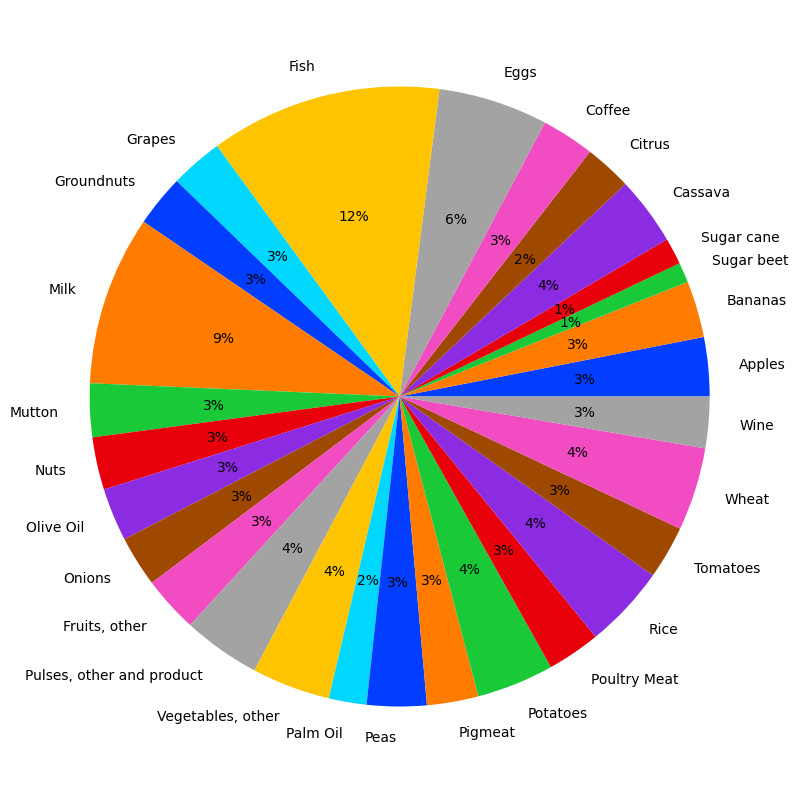

In [336]:
# Dizionario alimento => sub_df
alimenti_dict = dict()
keys = cibi.to_list()

for i in range(len(keys)):
     if keys[i] in colonne_dict.keys():
          keys[i] = colonne_dict[keys[i]].capitalize()

# Assegnazione delle chiavi a delle liste vuote
for key in keys:
     alimenti_dict[key] = list()

# Divisione dei record in base all'alimento
for index, record in prodotti_tracciati_df.iterrows():
     for key in keys:
          if record["Item"].lower().startswith(key.lower()) and index not in alimenti_dict[key]:
               alimenti_dict[key].append(index)

# Cerco le categorie vuote
prodotti_vuoti = []
for key in alimenti_dict.keys():
     if len(alimenti_dict[key]) == 0:
          prodotti_vuoti.append(key)

# Elimino le categorie di prodotto che hanno una lista di lunghezza 0
for prodotto_vuoto in prodotti_vuoti:
     alimenti_dict.pop(prodotto_vuoto, None)
alimenti_dict.keys()

alimenti_trovati = list(alimenti_dict.keys())
alimenti_quantita = [len(alimenti_dict[alimenti]) for alimenti in alimenti_trovati]
color_palette = sns.color_palette('bright')[0:len(alimenti_trovati) - 1]

print("Totale di alimenti = ", sum(alimenti_quantita))
plt.figure(figsize=(10, 20))
plt.pie(x=alimenti_quantita, labels=alimenti_trovati, colors=color_palette, autopct='%.0f%%')
plt.show()

# Effettuo la pulizia dati
### Elimino le righe cha hanno valori nulli.  

In [337]:
indici_da_eliminare = list()

for key in alimenti_dict.keys():
     for index in alimenti_dict[key]:
          if not prodotti_tracciati_df.iloc[index]["Item"].lower().startswith(key.lower()):
               indici_da_eliminare.append(int(index))

# Pulizia degli indici
for indice_da_eliminare in indici_da_eliminare:
     if indice_da_eliminare in prodotti_tracciati:
          prodotti_tracciati.remove(indice_da_eliminare)

prodotti_tracciati_df = FAO_df.iloc[prodotti_tracciati]
prodotti_tracciati_df = prodotti_tracciati_df[FAO_df_colonne_interessate].reset_index()
prodotti_tracciati_df = prodotti_tracciati_df.dropna().reset_index()
prodotti_tracciati_df.drop(columns=["level_0", "index"], inplace=True)
prodotti_tracciati_df["Prod. 1961 - 2013"] = prodotti_tracciati_df[[f"Y{i}" for i in range(1961, 2014)]].sum(axis=1)
cond = prodotti_tracciati_df["Prod. 1961 - 2013"] != 0
prodotti_tracciati_df = prodotti_tracciati_df[cond]


# Esplorazione dei dati
#### Come primo step esplorativo andremo a vedere cosa viene prodotto in quantita' maggiore tra mangimi(Feed) e cibo(Food) in media dal 1961 al 2013.

In [338]:
cibi_mangimi = prodotti_tracciati_df.groupby("Element")[[f"Y{i}" for i in range(1961, 2014)]].mean()
print("Cibo prodotto dal 1960 al 2013: ", cibi_mangimi.iloc[1].sum())
print("Mangime prodotto dal 1960 al 2013: ", cibi_mangimi.iloc[0].sum())
cibi_mangimi


Cibo prodotto dal 1960 al 2013:  31890.85144464331
Mangime prodotto dal 1960 al 2013:  20897.416164053076


,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Element,,,,,,,,,,,,,,,,,,,,,
Feed,306.495778,312.610374,322.412545,329.761158,328.675513,342.454765,338.193004,365.063932,362.295537,352.369119,...,457.699638,454.934861,468.605549,467.661037,490.710495,501.890229,505.241255,553.435464,557.232811,568.977081
Food,292.129890,297.916134,305.809512,313.248018,321.925339,329.274866,334.969573,347.122475,353.654053,361.072360,...,865.456405,886.113782,907.593710,935.982102,957.513168,975.363334,1000.261059,1025.631041,1050.720020,1064.981335


# Anno di maggiore produzione di cibi e mangimi
#### Tutti i valori vanno moltiplicati per 1000

In [339]:
magimi_max_produzione = cibi_mangimi.loc["Feed"].max()
cibo_max_produzione = cibi_mangimi.loc["Food"].max()
print(cibi_mangimi.loc["Feed"].max() * 1000, " tonnellate di mangime nell'anno", cibi_mangimi.idxmax(axis=1)[0].split("Y")[1])
print(cibi_mangimi.loc["Food"].max() * 1000, "tonnellate di cibo nell'anno", cibi_mangimi.idxmax(axis=1)[1].split("Y")[1])

568977.0808202655  tonnellate di mangime nell'anno 2013
1064981.3346970084 tonnellate di cibo nell'anno 2013


#### I valori più elevati corrispondono con il 2013 che è anche l'ultimo anno a disposizione.
# Cibi
#### Vedremo l'aumento della produzione di cibi anno per anno, ogni colonna ci dice di quanto è aumentata la produzione rispetto all'anno precedente.

In [340]:
Food = cibi_mangimi.loc["Food"]

Food_yearly_increment = [abs(Food[f"Y{i}"] - Food[f"Y{i+1}"]) for i in range(1961, 2014) if i + 1 < 2014]
Food_yearly_increment_df = pd.DataFrame()
for i in range(1961, 2014):
     if i+1 < 2014:
          Food_yearly_increment_df[f"Y{i}/Y{i+1}"] = pd.Series(Food_yearly_increment[abs(1961 - i)])

print(f"Incremento annuo medio della produzione di cibo = {Food_yearly_increment_df.iloc[0].mean() * 1000} tonnellate")
Food_yearly_increment_df * 1000

Incremento annuo medio della produzione di cibo = 14862.527781602186 tonnellate


,Y1961/Y1962,Y1962/Y1963,Y1963/Y1964,Y1964/Y1965,Y1965/Y1966,Y1966/Y1967,Y1967/Y1968,Y1968/Y1969,Y1969/Y1970,Y1970/Y1971,...,Y2003/Y2004,Y2004/Y2005,Y2005/Y2006,Y2006/Y2007,Y2007/Y2008,Y2008/Y2009,Y2009/Y2010,Y2010/Y2011,Y2011/Y2012,Y2012/Y2013
0,5786.243927,7893.377653,7438.506776,8677.320378,7349.526975,5694.707236,12152.902071,6531.577602,7418.307338,7535.157249,...,19188.954232,20657.37663,21479.928407,28388.391716,21531.066223,17850.166198,24897.724367,25369.982102,25088.979801,14261.314242


# Mangimi
#### Ogni colonna ci dice di quanto è aumentata la produzione rispetto all'anno precedente

In [368]:
Feed = cibi_mangimi.loc["Feed"]

Feed_yearly_increment = [abs(Feed[f"Y{i}"] - Feed[f"Y{i+1}"]) for i in range(1961, 2014) if i + 1 < 2014]
Feed_yearly_increment_df = pd.DataFrame()
for i in range(1961, 2014):
     if i+1 < 2014:
          Feed_yearly_increment_df[f"Y{i}/Y{i+1}"] = pd.Series(Feed_yearly_increment[abs(1961 - i)])

print(f"Incremento annuo medio della produzione di mangimi = {Feed_yearly_increment_df.iloc[0].mean() * 1000} tonnellate")
Feed_yearly_increment_df

Incremento annuo medio della produzione di mangimi = 11787.02329034054 tonnellate


,Y1961/Y1962,Y1962/Y1963,Y1963/Y1964,Y1964/Y1965,Y1965/Y1966,Y1966/Y1967,Y1967/Y1968,Y1968/Y1969,Y1969/Y1970,Y1970/Y1971,...,Y2003/Y2004,Y2004/Y2005,Y2005/Y2006,Y2006/Y2007,Y2007/Y2008,Y2008/Y2009,Y2009/Y2010,Y2010/Y2011,Y2011/Y2012,Y2012/Y2013
0,6.114596,9.802171,7.348613,1.085645,13.779252,4.261761,26.870929,2.768396,9.926417,13.924005,...,23.575392,2.764777,13.670688,0.944511,23.049457,11.179735,3.351025,48.19421,3.797346,11.74427


# Cibi piu' e meno prodotti dal 1961 al 2013
#### Scopriremo quali sono i 5 cibi piu' prodotti ed i 5 cibi meno prodotti dal 1961 al 2013.

<AxesSubplot: xlabel='Tonnes', ylabel='Type'>

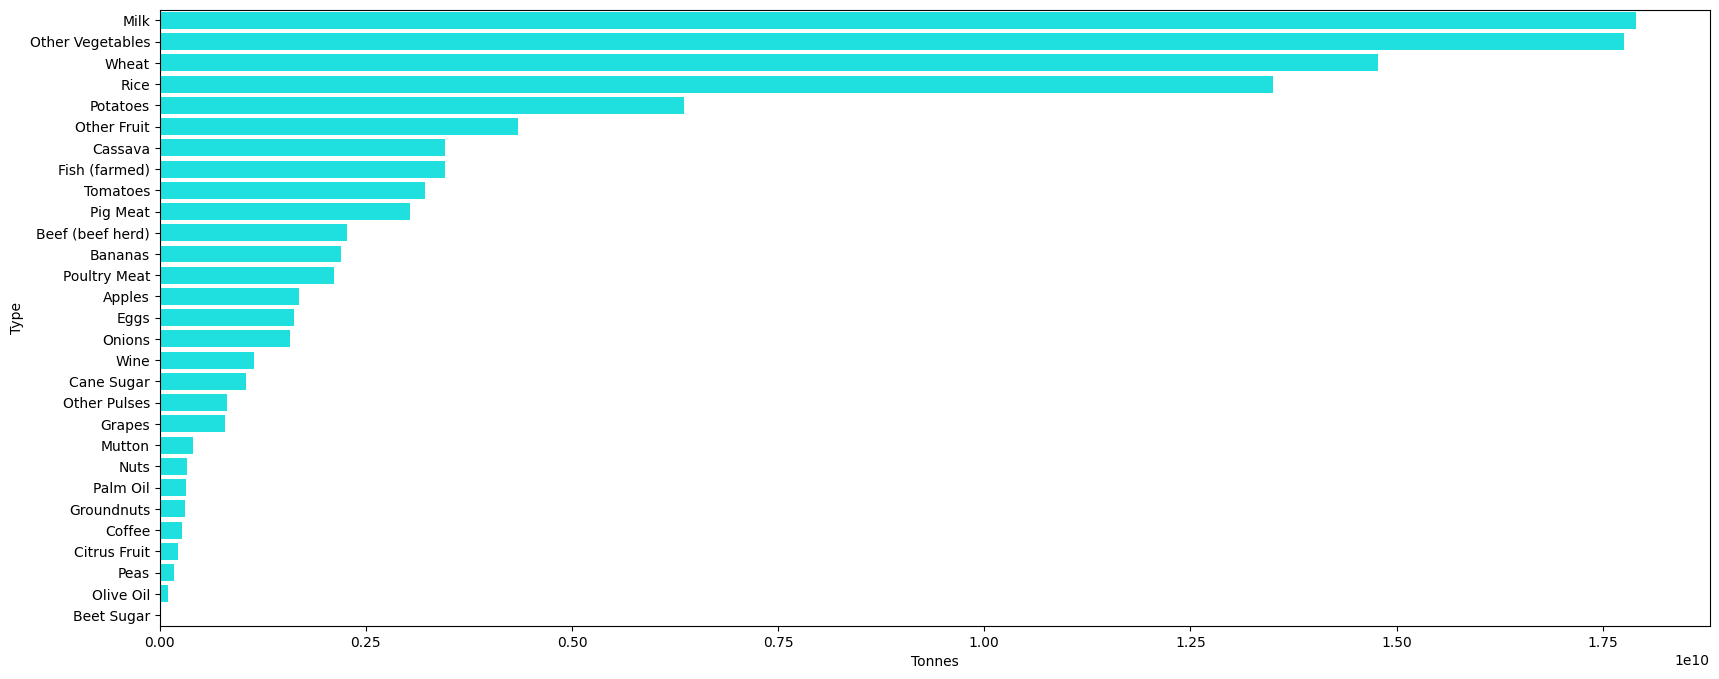

In [357]:
columns_interested = ["Item", "Element", "Area", "Prod. 1961 - 2013", "Type"]
Food_items = prodotti_tracciati_df[columns_interested]
Food_items = Food_items[Food_items["Element"] == "Food"]
Food_items = Food_items.sort_values(by=["Prod. 1961 - 2013"], ascending=False).reset_index().drop(columns=["index"]).drop_duplicates().reset_index().drop(columns=["index"])
Food_items["Tonnes"] = Food_items["Prod. 1961 - 2013"] * 1000
temp_df = Food_items.groupby("Type").sum(numeric_only=True).sort_values(by="Tonnes", ascending=False)

f, ax = plt.subplots(figsize=(20, 8))
sns.barplot(
     x=temp_df["Tonnes"],
     y=temp_df.index,
     color='cyan',
     orient='h'
)



# Mangimi più e meno prodotti dal 1961 al 2013
### Scopriremo quali sono i 5 mangimi più prodotti ed i 5 mangimi meno prodotti dal 1961 al 2013.

<AxesSubplot: xlabel='Tonnes', ylabel='Type'>

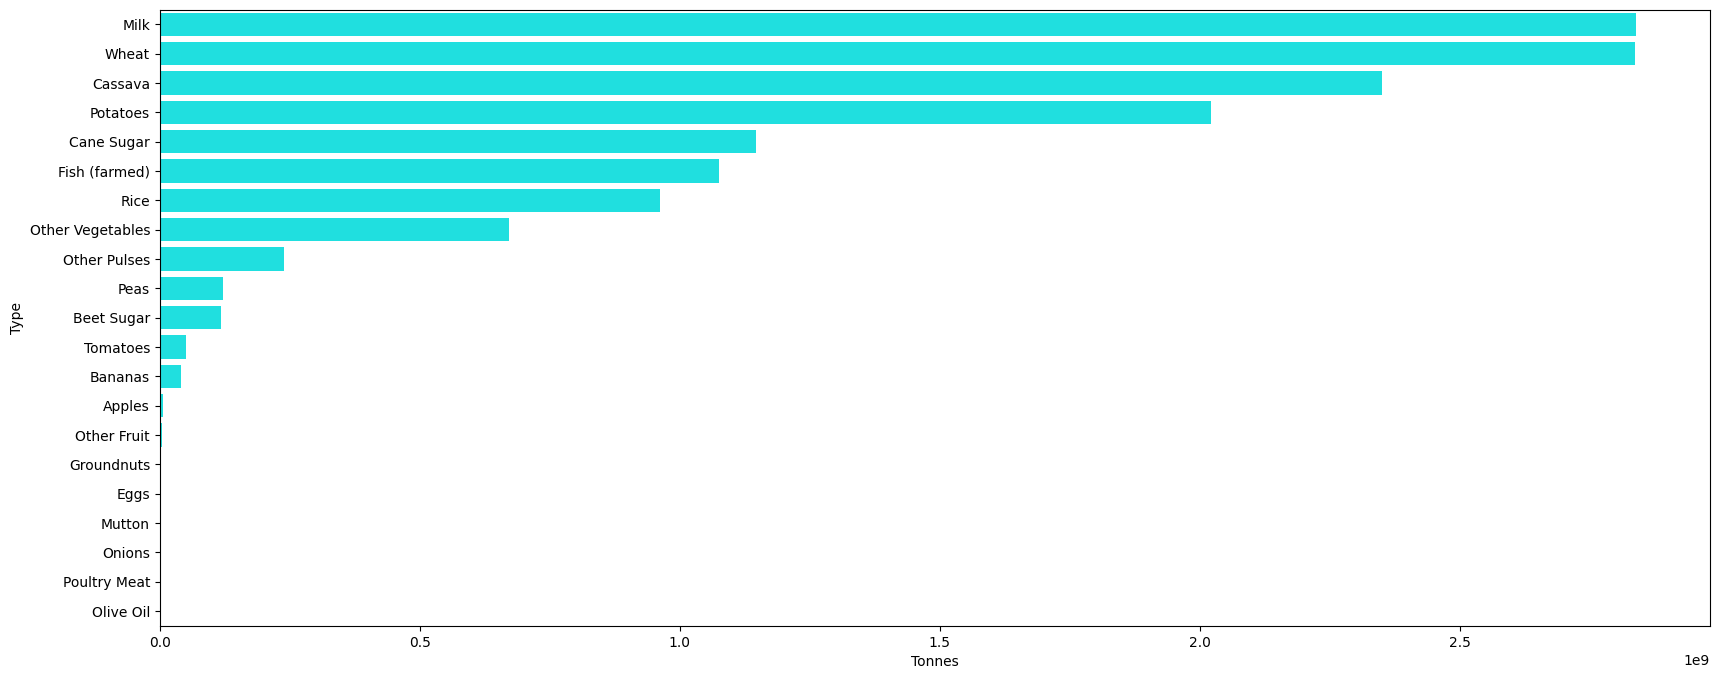

In [358]:
Feed_items = prodotti_tracciati_df[columns_interested]
Feed_items = Feed_items[Feed_items["Element"] == "Feed"]
Feed_items = Feed_items.sort_values(by=["Prod. 1961 - 2013"], ascending=False).reset_index().drop(columns=["index"]).drop_duplicates().reset_index().drop(columns=["index"])
Feed_items["Tonnes"] = Feed_items["Prod. 1961 - 2013"] * 1000

temp_df = Feed_items.groupby("Type").sum(numeric_only=True).sort_values(by="Tonnes", ascending=False)

f, ax = plt.subplots(figsize=(20, 8))
sns.barplot(
     x=temp_df["Tonnes"],
     y=temp_df.index,
     color='cyan',
     orient='h'
)

# Si va a calcolare l'inquinamento dei cibi più prodotti a livello mondiale

#### Passaggio da tonnellate a KG

# Calcolo l'inquinamento da CO2 di tutti i cibi e mangimi

<AxesSubplot: xlabel='KGCO2', ylabel='Type'>

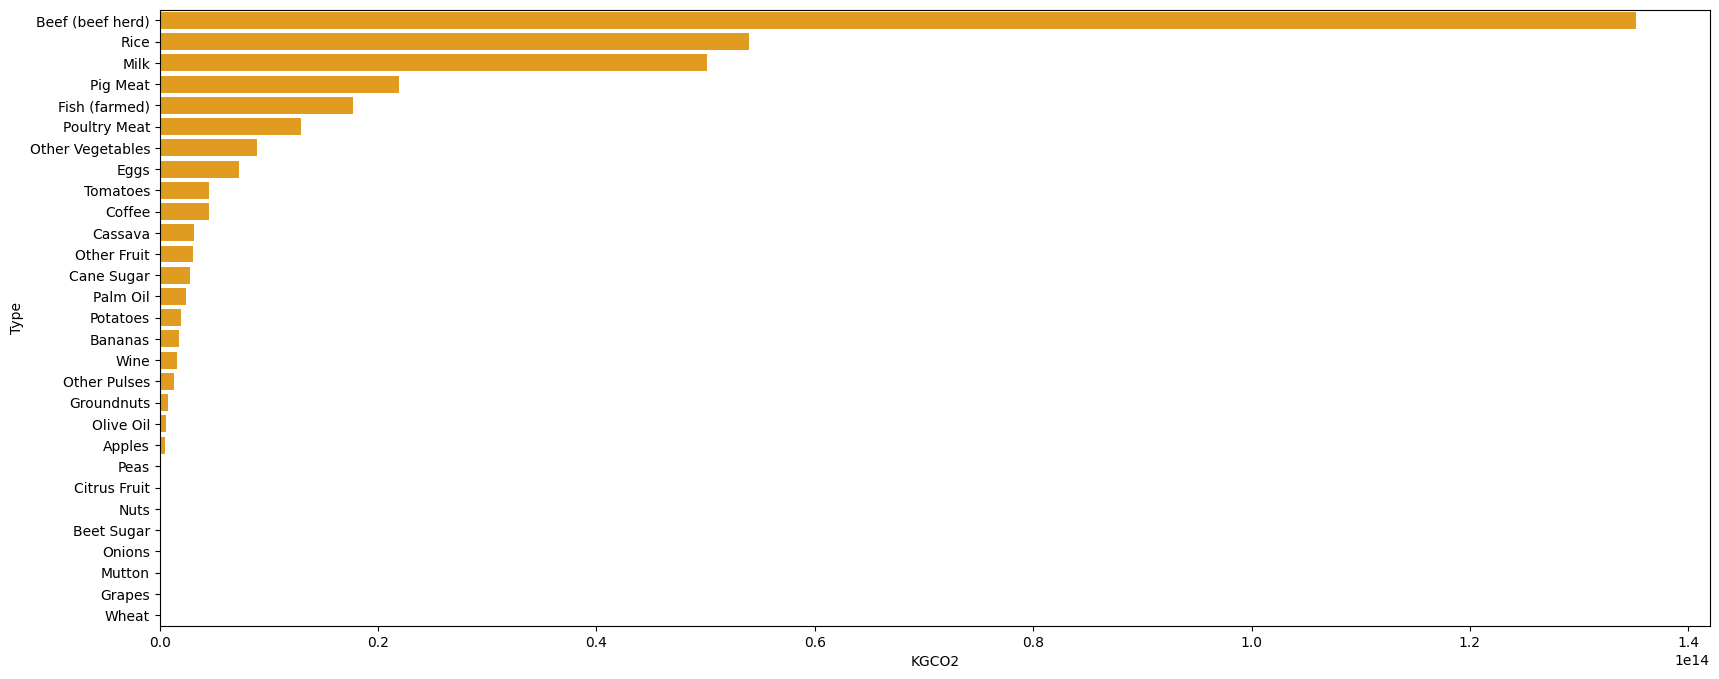

In [347]:
# Estrazione dei tipi di alimento
Food_types = Food_items["Type"].drop_duplicates().to_list()
Food_types_CO2KG = [Food_Production_df[Food_Production_df["Food product"] == food_type]["Total_emissions"].to_list() for food_type in Food_types]
# Creazione del dizionario
Food_types_CO2KG_dict = dict()
for i in range(len(Food_types)):
     Food_types_CO2KG_dict[Food_types[i]] = 0

     if len(Food_types_CO2KG[i]) != 0:
          Food_types_CO2KG_dict[Food_types[i]] = Food_types_CO2KG[i][0]

for index, record in Food_items.iterrows():
     Food_type = record["Type"]
     if Food_type in Food_types_CO2KG_dict.keys():
          Food_items.at[index, "KGCO2"] =  Food_items.at[index, "Tonnes"] * Food_types_CO2KG_dict[Food_type] * 1000
          Food_items.at[index, "TonnesCO2"] = Food_items.at[index, "Tonnes"] * Food_types_CO2KG_dict[Food_type]

temp_df = Food_items.groupby("Type").sum(numeric_only=True).sort_values(by="KGCO2", ascending=False)
temp_df

f, ax = plt.subplots(figsize=(20, 8))
sns.barplot(
     x=temp_df["KGCO2"],
     y=temp_df.index,
     color='orange',
     orient='h'
)


# Calcolo eutrofizzazione dei cibi e mangimi prodotti a livello mondiale prodotti

#### L'eutrofizzazione è un fenomeno dato dal rilascio della sostanza PO4 creerò una colonna che calcola i grammi di PO4 per ogni kilo di cibo/mangime prodotto

<AxesSubplot: xlabel='Total gPO4 per kilogram', ylabel='Type'>

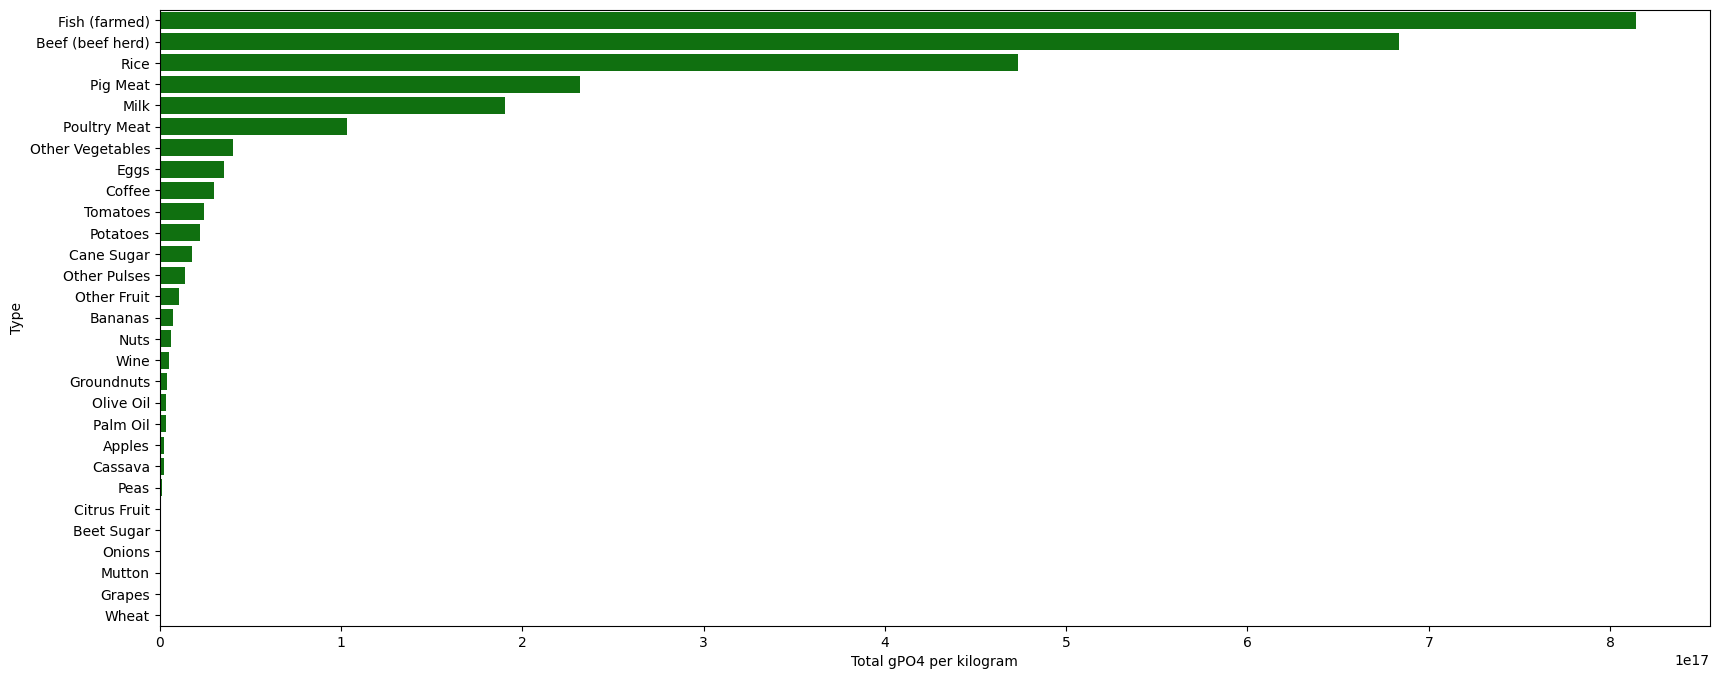

In [348]:
Food_types_PO4_emissions = [Food_Production_df[Food_Production_df["Food product"] == food_type]["Eutrophying emissions per kilogram (gPO₄eq per kilogram)"].to_list() for food_type in Food_types]
Food_types_PO4_dict = dict()
for i in range(len(Food_types)):
     Food_types_PO4_dict[Food_types[i]] = 0

     if len(Food_types_PO4_emissions[i]) != 0:
          Food_types_PO4_dict[Food_types[i]] = Food_types_PO4_emissions[i][0]

for index, record in Food_items.iterrows():
     Food_type = record["Type"]
     if Food_type in Food_types_PO4_dict.keys():
          Food_items.at[index, "Total gPO4 per kilogram"] =  Food_items.at[index, "Tonnes"] * 1000000 * Food_types_PO4_dict[Food_type]

temp_df = Food_items.groupby("Type").sum(numeric_only=True).sort_values(by="Total gPO4 per kilogram", ascending=False)

f, ax = plt.subplots(figsize=(20, 8))
sns.barplot(
     x=temp_df["Total gPO4 per kilogram"],
     y=temp_df.index,
     color='g',
     orient='h'
)

# Calcolo acqua usata per i cibi/mangimi prodotti a livello mondiale

<AxesSubplot: xlabel='Total water(lt) per kilogram', ylabel='Type'>

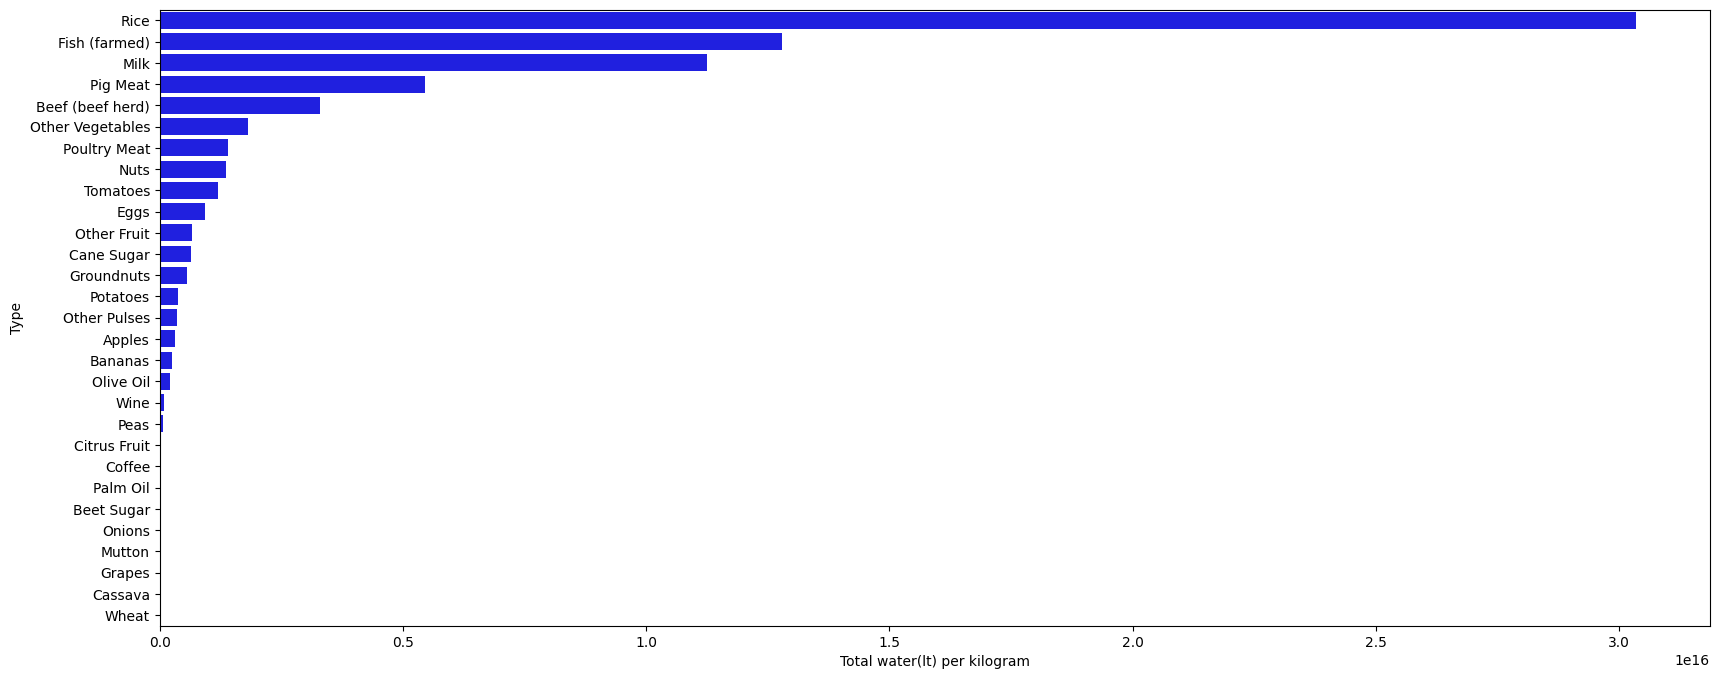

In [349]:
Food_types_water_liters_per_kilogram = [Food_Production_df[Food_Production_df["Food product"] == food_type]["Freshwater withdrawals per kilogram (liters per kilogram)"].to_list() for food_type in Food_types]
Food_types_water_liters_per_kilogram_dict = dict()
for i in range(len(Food_types)):
     Food_types_water_liters_per_kilogram_dict[Food_types[i]] = 0

     if len(Food_types_water_liters_per_kilogram[i]) != 0:
          Food_types_water_liters_per_kilogram_dict[Food_types[i]] = Food_types_water_liters_per_kilogram[i][0]

for index, record in Food_items.iterrows():
     Food_type = record["Type"]
     if Food_type in Food_types_water_liters_per_kilogram_dict.keys():
          Food_items.at[index, "Total water(lt) per kilogram"] =  Food_items.at[index, "Tonnes"] * 1000 * Food_types_water_liters_per_kilogram_dict[Food_type]

temp_df = Food_items.groupby("Type").sum(numeric_only=True).sort_values(by="Total water(lt) per kilogram", ascending=False)

f, ax = plt.subplots(figsize=(20, 8))
sns.barplot(
     x=temp_df["Total water(lt) per kilogram"],
     y=temp_df.index,
     color='b',
     orient='h'
)

# Calcolo emissione gas serra prodotti dal 1961 al 2013

#### Per questo calcolo andrò a inserire per ogni prodotto tracciato il numero di kcal presenti in 100gr di cibo/mangime uso google come fonte per i miei dati.
#### Verrà create una nuova colonna chiamata "Kg producted x 1000kcal" che ci dirà quanti chili devono essere prodotti per generare 1000kcal.
#### Subito dopo mostrerò un istogramma in orizzontale per mostrare quali sono i cibi che emettono più gas serra

<AxesSubplot: xlabel='CO2eqTonnes', ylabel='Item'>

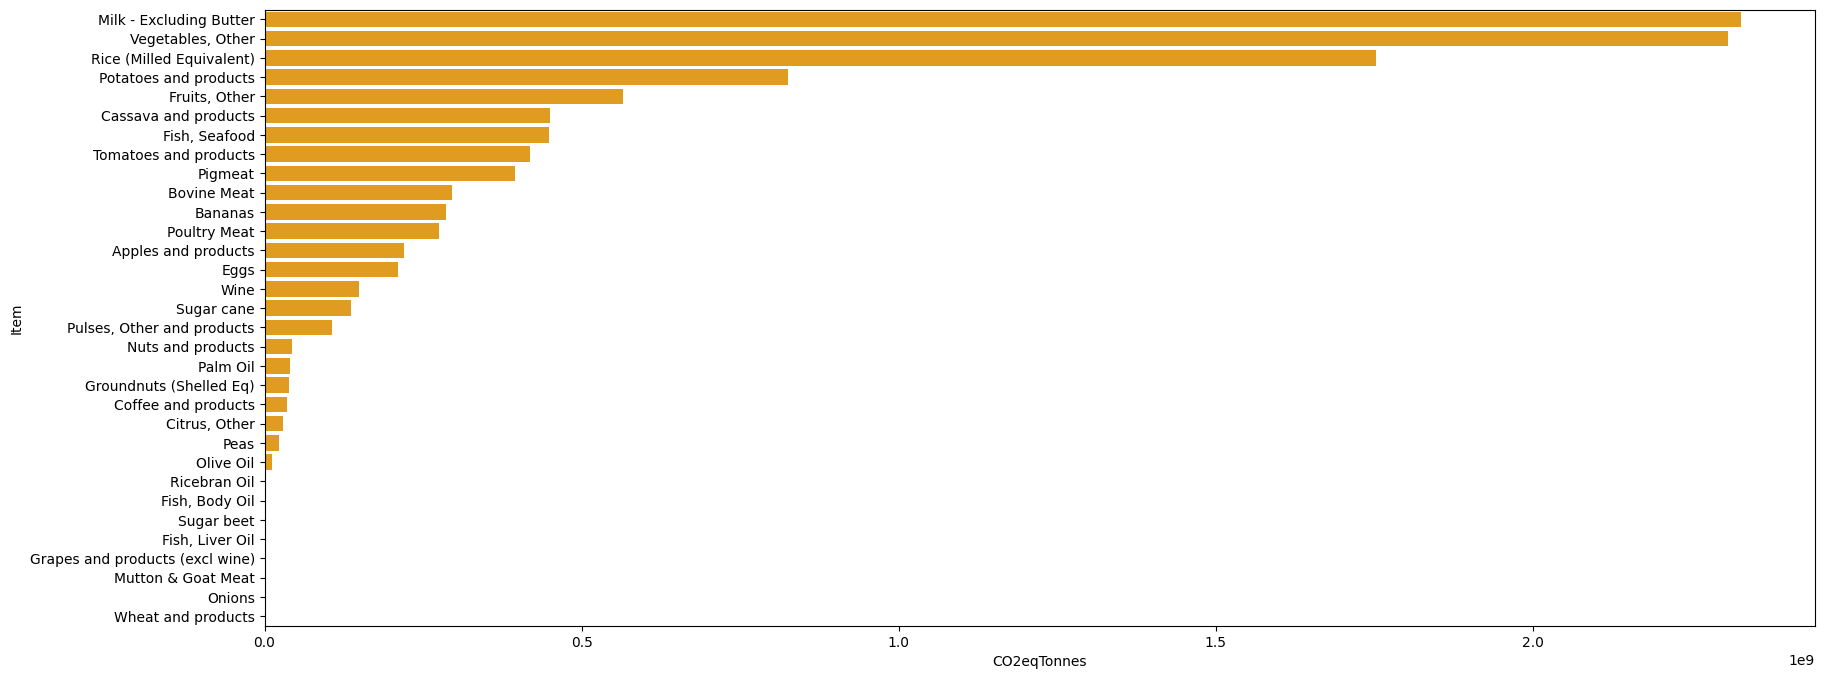

In [351]:
Food_kcalories_100gr = {

     "Other Vegetables": 65,
     "Rice": 130,
     "Wheat": 329,
     "Milk": 42,
     "Potatoes": 77,
     "Pig Meat": 242,
     "Fish (farmed)": 158,
     "Other Fruit": 80,
     "Tomatoes": 18,
     "Beef (beef herd)": 332,
     "Cassava": 159,
     "Eggs": 155,
     "Poultry Meat": 272,
     "Cane Sugar": 400,
     "Bananas": 89,
     "Apples": 52,
     "Other Pulses": 181,
     "Onions": 40,
     "Wine": 83,
     "Grapes": 67,
     "Citrus Fruit": 72,
     "Groundnuts": 567,
     "Mutton": 294,
     "Coffee": 0,
     "Peas": 81,
     "Palm Oil": 884,
     "Nuts": 607,
     "Olive Oil": 884,
     "Beet Sugar": 405,

}

# Aggiungo la colonna a Food_Production_df
for index, record in Food_Production_df.iterrows():
     Type = record["Food product"]
     if Type in Food_kcalories_100gr.keys():
          if Food_kcalories_100gr[Type] != 0 and Food_kcalories_100gr[Type] != np.NAN:
               Food_Production_df.at[index, "Kg producted x 1000kcal"] = (1000 / (Food_kcalories_100gr[Type]))

gas_serra_emissions = Food_items["Tonnes"] * 1000**2 # Con questa operazione porto tutto alla grandezza dei grammi
for index, record in Food_items.iterrows():
     Type = record["Type"]
     if Type in Food_kcalories_100gr.keys():
          if len(Food_Production_df[Food_Production_df["Food product"] == Type]["Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"].values) != 0:
               Food_items.at[index, "KGCO2eq tot"] = ((record["Tonnes"] * 1000)/(Food_Production_df[Food_Production_df["Food product"] == "Rice"]["Kg producted x 1000kcal"]))
          else:
               Food_items.at[index, "KGCO2eq tot"] = 0

Food_items = Food_items.assign(CO2eqTonnes=Food_items["KGCO2eq tot"]/1000)
temp_df = Food_items.groupby("Item").sum(numeric_only=True).sort_values(by="KGCO2eq tot", ascending=False)

f, ax = plt.subplots(figsize=(20, 8))
sns.barplot(
     x=temp_df["CO2eqTonnes"],
     y=temp_df.index,
     color='orange',
     orient='h'
)